# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

file = 'sbikedata.csv'
seoul_bike = pd.read_csv(file, sep = ',', encoding = 'cp949')

In [29]:
seoul_bike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [94]:
# 데이터 기본 구조 파악
def Check_Data_Basic(df, col):
    print('===' * 20)
    print(col,'의 구조 파악')
    display(df[col])
    print()
    print('===' * 20)
    print(col,'의 데이터 타입 파악')
    display(df[col].dtype)

# 데이터 결측치 파악
def Check_Nan(df, col):
    filter1 = df[col].isnull() == True
    filter2 = df[col] == ' ' 
    print('데이터 빈칸 확인')
    display(df[filter2])
    print()
    print('==='*20)
    print('데이터 NaN 확인')
    display(df[filter1])
    
# 데이터 분포 시각화 확인
def Check_Visual(df, col):
    fig, axe = plt.subplots(2,1, figsize = (9,6),  height_ratios=[.2, .8], layout = 'constrained')
    sns.boxplot(data = df, x = col, ax = axe[0])
    sns.histplot(data = df, x = col, kde = True, ax = axe[1])
    title_font = {'fontsize': 15, 'fontweight': 'bold'}
    axe[0].set_title(col + '이상치 확인', title_font)
    axe[1].set_title(col + '분포 확인', title_font)

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_bike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_bike.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_bike.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_bike['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

### (1) 변수별 단변량 분석

#### 1) Feature1 : hour

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_bike['hour'].dtype

dtype('int64')

변수의 결측치 존재 여부 및 조치방안

In [84]:
Check_Nan(seoul_bike, 'hour')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

변수의 분포 확인
* kdeplot 활용

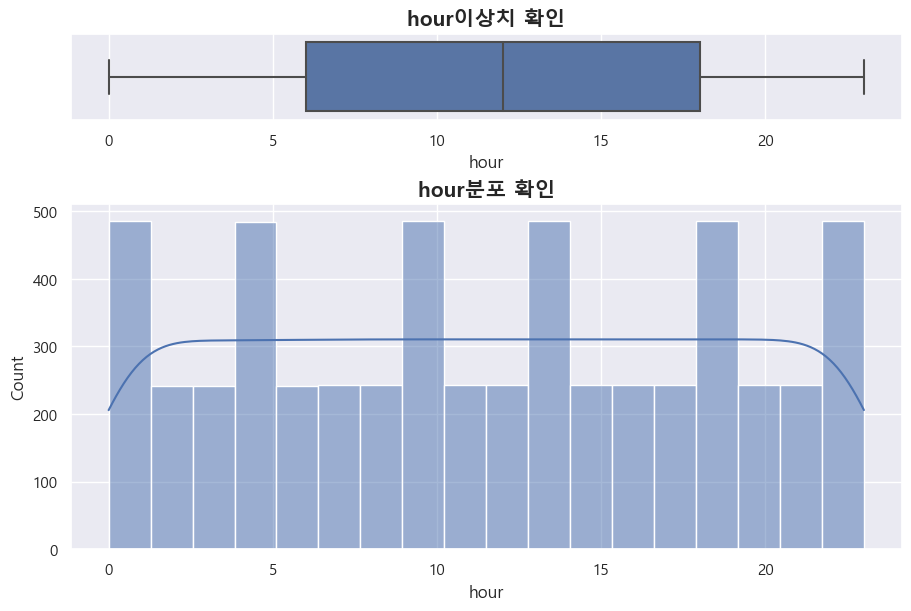

In [95]:
Check_Visual(seoul_bike, 'hour')

위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [60]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'temperature')

temperature 의 구조 파악


0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64


temperature 의 데이터 타입 파악


dtype('float64')

변수의 결측치 존재 여부 및 조치방안

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'temperature')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

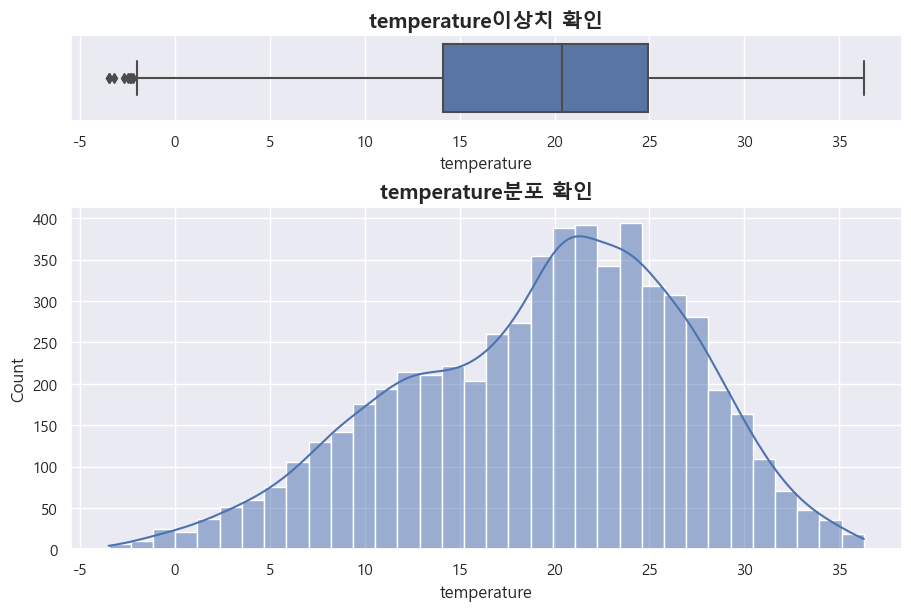

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'temperature')

변수의 분포 확인

In [97]:
# 이상치 존재

위 정보로 부터 파악한 내용 정리


#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [98]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'precipitation')

precipitation 의 구조 파악


0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64


precipitation 의 데이터 타입 파악


dtype('int64')

변수의 결측치 존재 여부 및 조치 방안


In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'precipitation')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

변수의 분포 확인

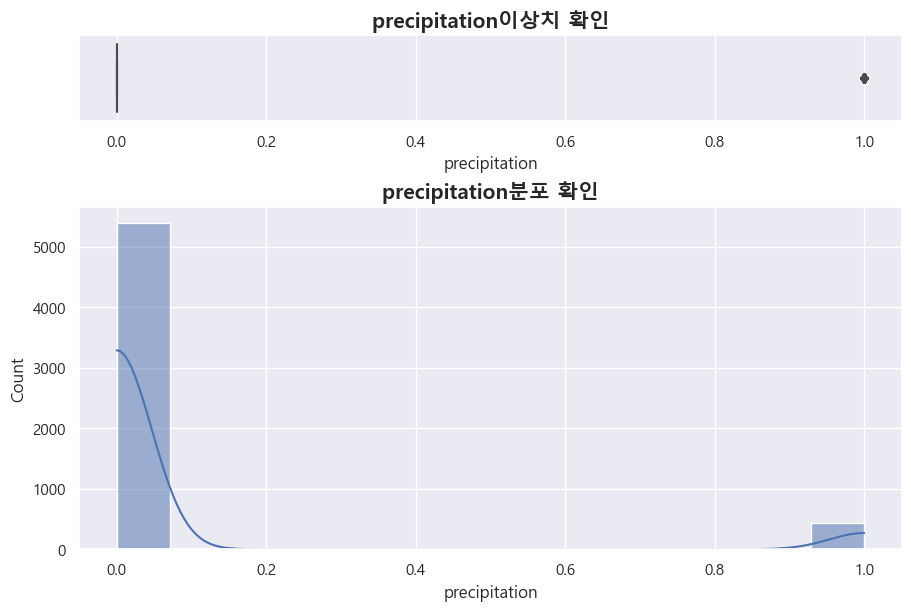

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'precipitation')

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 수치형이지만 범주로 생각할 필요가 있음
# 또한 비가 왔을 경우는 목표에 크게 상관이 없는 데이터 값인 것 같다. (삭제해도 될듯하다.)

위 정보로 부터 파악한 내용 정리


#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

변수가 수치형인지 범주형인지


In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'windspeed')

windspeed 의 구조 파악


0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5822    0.3
5823    2.0
5824    1.9
5825    2.1
5826    2.3
Name: windspeed, Length: 5827, dtype: float64


windspeed 의 데이터 타입 파악


dtype('float64')

변수의 결측치 존재 여부 및 조치방안

In [102]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'windspeed')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

변수의 분포 확인

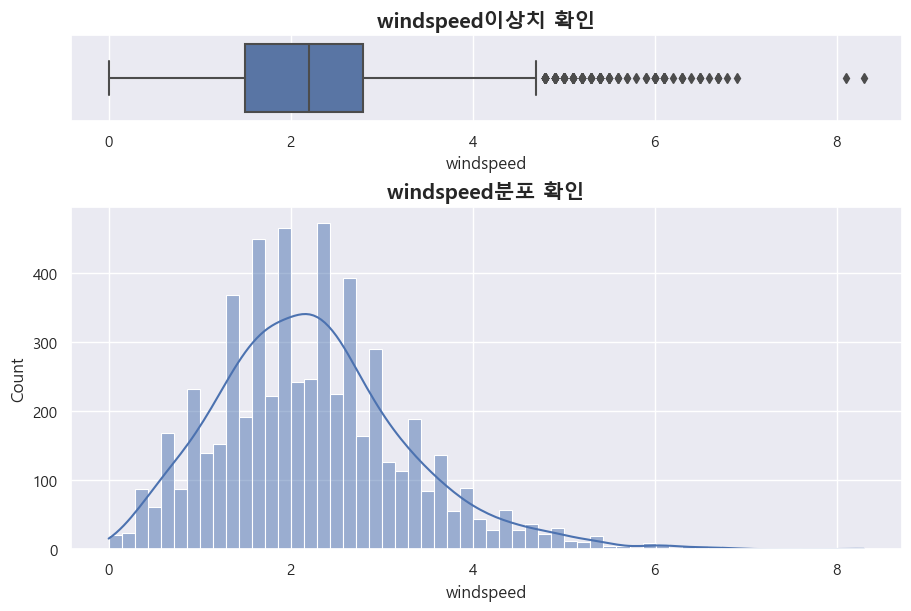

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'windspeed')

위 정보로 부터 파악한 내용 정리


#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

변수가 수치형인지 범주형인지


In [104]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'humidity')

humidity 의 구조 파악


0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64


humidity 의 데이터 타입 파악


dtype('int64')

변수의 결측치 존재 여부 및 조치방안

In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'humidity')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

변수의 분포 확인

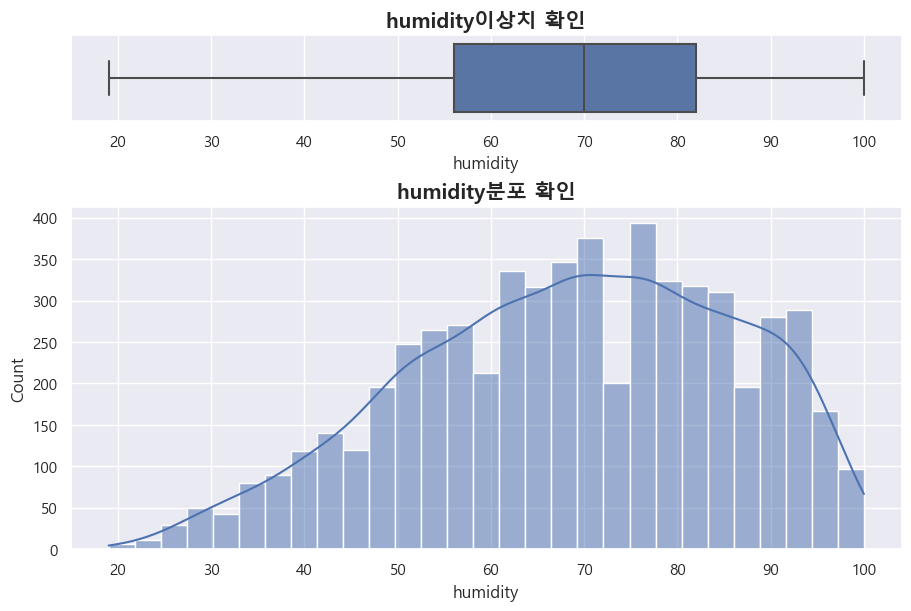

In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'humidity')

위 정보로 부터 파악한 내용 정리


#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

변수가 수치형인지 범주형인지

In [108]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
Check_Data_Basic(seoul_bike, 'visibility')

visibility 의 구조 파악


0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64


visibility 의 데이터 타입 파악


dtype('int64')

변수의 결측치 존재 여부 및 조치방안

In [109]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'visibility')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 기초 통계량 확인

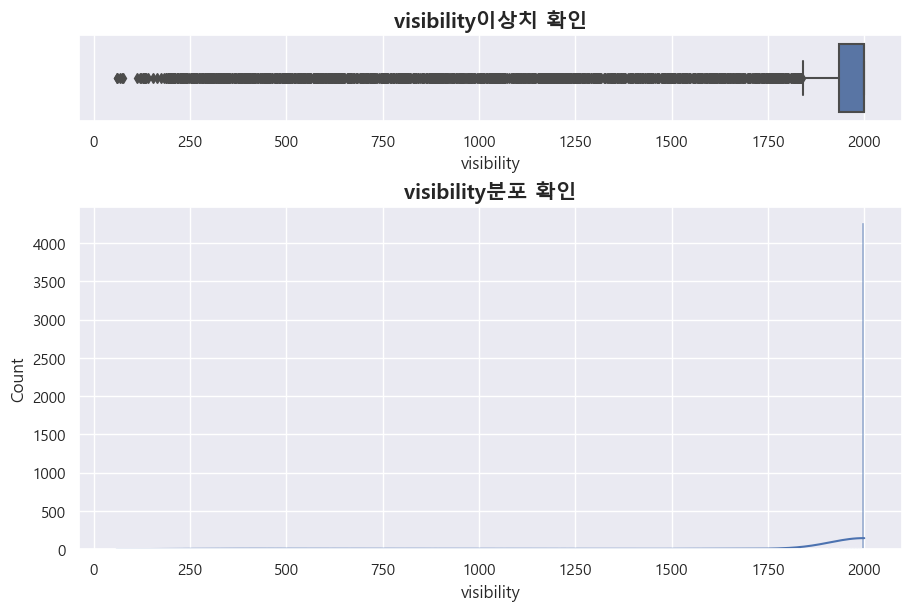

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'visibility')

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 무슨데이터인지 판별조차 안선다.

위 정보로 부터 파악한 내용 정리


#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

변수가 수치형인지 범주형인지


In [111]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'ozone')

ozone 의 구조 파악


0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64


ozone 의 데이터 타입 파악


dtype('float64')

변수의 결측치 존재 여부 및 조치방안

In [112]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'ozone')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
540,2021-04-23,13,NaN,NaN,NaN,20.6,0,4.0,33,2000,236
...,...,...,...,...,...,...,...,...,...,...,...
5648,2021-11-22,14,22.0,7.0,NaN,3.0,0,6.2,63,2000,143
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157
5650,2021-11-22,16,49.0,23.0,NaN,3.2,0,6.1,52,2000,155
5651,2021-11-22,17,43.0,19.0,NaN,2.1,0,4.6,56,2000,277


만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [121]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 몇개 존재하는지 확인 필요
filter_oz = seoul_bike['ozone'].isnull() == True
seoul_bike['ozone'][filter_oz]
# 128개 존재 분포를 보고 대체할 것인지 처리할 것인지 확인

274    NaN
275    NaN
538    NaN
539    NaN
540    NaN
        ..
5648   NaN
5649   NaN
5650   NaN
5651   NaN
5652   NaN
Name: ozone, Length: 128, dtype: float64

변수의 기초 통계량 확인

변수의 분포 확인

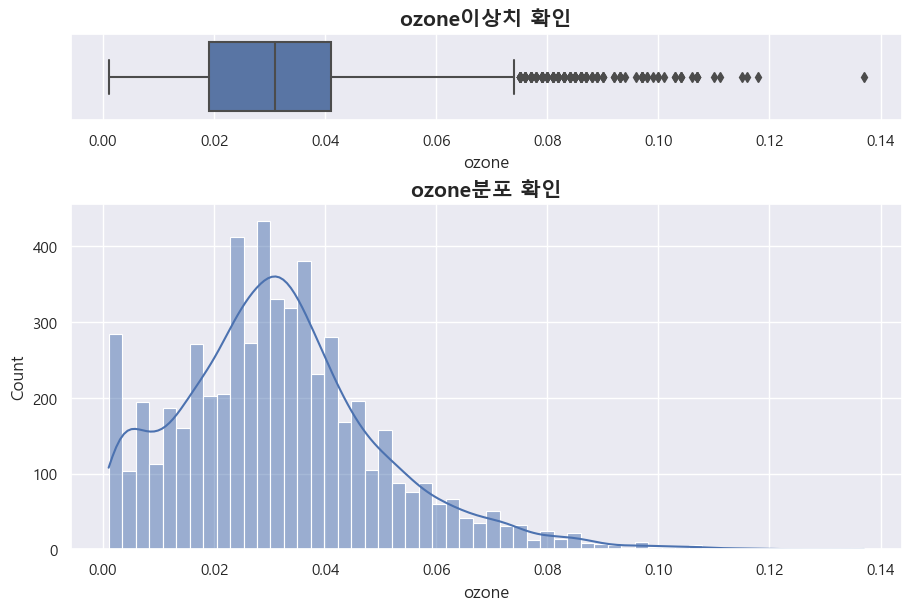

In [122]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'ozone')

위 정보로 부터 파악한 내용 정리


#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

변수가 수치형인지 범주형인지


In [123]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'PM10')

PM10 의 구조 파악


0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5827, dtype: float64


PM10 의 데이터 타입 파악


dtype('float64')

In [124]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'PM10')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5147,2021-11-01,17,NaN,NaN,NaN,14.8,0,2.6,61,2000,525
5503,2021-11-16,13,NaN,NaN,NaN,12.5,0,2.6,36,2000,227
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233


변수의 결측치 존재 여부 및 조치방안

In [125]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 역시 확인 필요
filter_pm10 = seoul_bike['PM10'].isnull() == True
seoul_bike['PM10'][filter_pm10]
# 102개 존재

274    NaN
275    NaN
276    NaN
538    NaN
539    NaN
        ..
5147   NaN
5503   NaN
5504   NaN
5505   NaN
5506   NaN
Name: PM10, Length: 102, dtype: float64

변수의 기초 통계량 확인

변수의 분포 확인

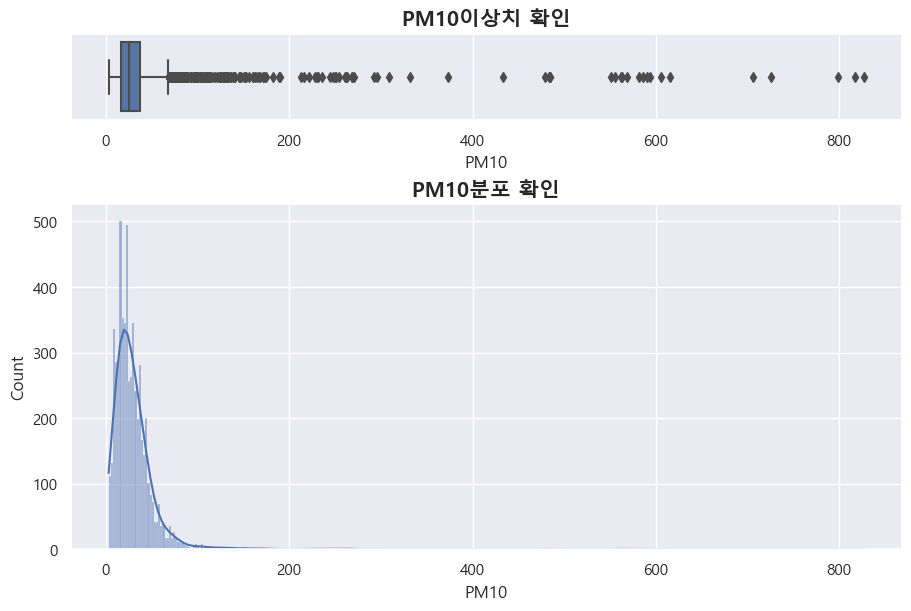

In [126]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
Check_Visual(seoul_bike, 'PM10')

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 이것도 Nan 제거하고 범위를 나누어 범주로 생각하는 것이 맞는 듯하다.

위 정보로 부터 파악한 내용 정리


#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

변수가 수치형인지 범주형인지


In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Data_Basic(seoul_bike, 'PM2.5')

PM2.5 의 구조 파악


0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64


PM2.5 의 데이터 타입 파악


dtype('float64')

In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Nan(seoul_bike, 'PM2.5')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233
5506,2021-11-16,16,NaN,NaN,NaN,13.0,0,3.0,41,2000,302
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157


변수의 결측치 존재 여부 및 조치방안

In [130]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
filter_pm25 = seoul_bike['PM2.5'].isnull() == True
seoul_bike['PM2.5'][filter_pm25]

274    NaN
275    NaN
276    NaN
538    NaN
539    NaN
        ..
5504   NaN
5505   NaN
5506   NaN
5649   NaN
5692   NaN
Name: PM2.5, Length: 95, dtype: float64

변수의 기초 통계량 확인

변수의 분포 확인

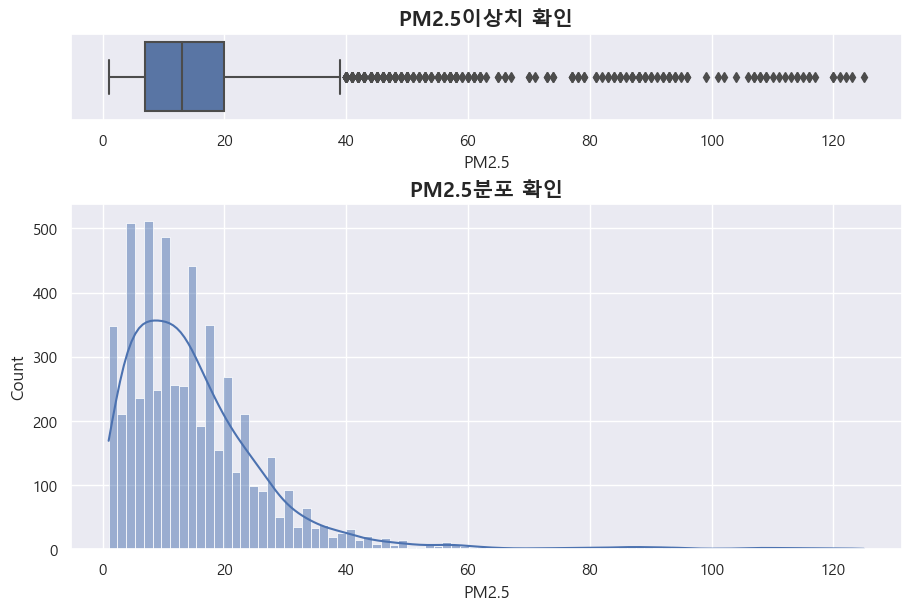

In [131]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

Check_Visual(seoul_bike, 'PM2.5')

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 미세먼지는 극한적으로 몰려 있는 반면 초미세먼지는 그렇게 몰려있지 않다.
# 사람들은 미세먼지를 더 신경쓰고 초미세먼지는 그렇게 신경쓰지 않는다.

위 정보로 부터 파악한 내용 정리


#### 10) Count (Target)

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

변수가 수치형인지 범주형인지


In [133]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


Check_Data_Basic(seoul_bike, 'count')

count 의 구조 파악


0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64


count 의 데이터 타입 파악


dtype('int64')

In [134]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


Check_Nan(seoul_bike, 'count')

데이터 빈칸 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count



데이터 NaN 확인


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


변수의 결측치 존재 여부 및 조치 방안

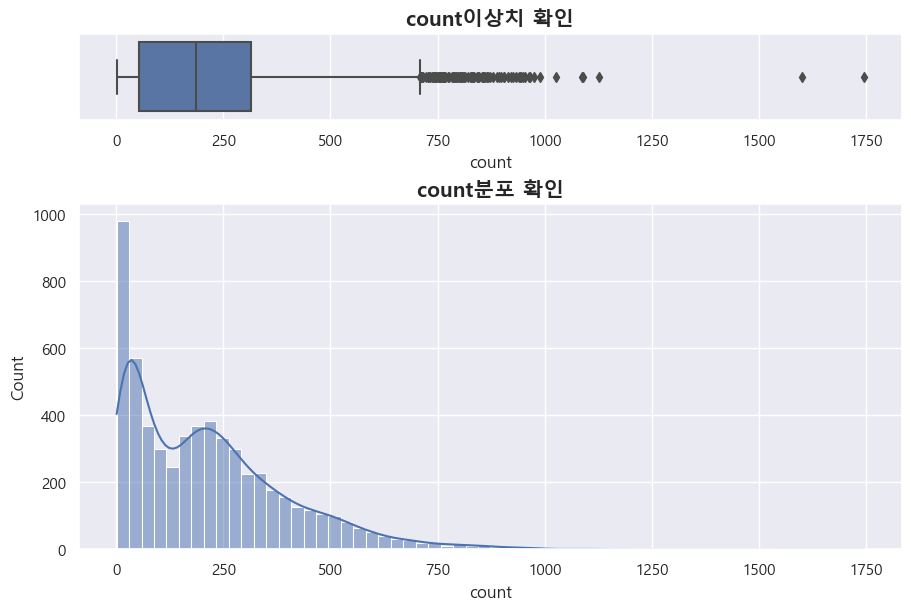

In [136]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


Check_Visual(seoul_bike, 'count')

변수의 기초 통계량 확인

변수의 분포 확인

# 아래에 실습코드를 작성하고 결과를 확인합니다.

**결과 정리**
1. 1
2. 2
3. 3
4. 4
5. 5
6. 6


위 정보로 부터 파악한 내용 정리
